In [16]:
import cv2
import matplotlib.pyplot as plt

In [17]:
config_file= "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [18]:
model=cv2.dnn_DetectionModel( frozen_model,config_file)

In [19]:
class_labels=[]
file_name="labels.txt"
with open(file_name,'rt') as fpt:
  classlabels=fpt.read().rstrip('\n').split('\n')

In [20]:
print(len(classlabels))

80


In [21]:
model.setInputSize(320,320)
model.setInputScale(1.0/127)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000258B7649650>

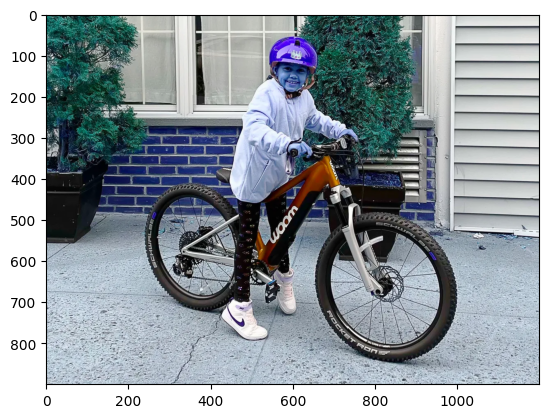

In [22]:
img=cv2.imread("woom-up-bike-rt-copy.webp")
plt.imshow(img)

In [23]:
ClassIndex, confidece, bbox=model.detect(img,confThreshold=0.5)

In [24]:
print(ClassIndex)

[ 2  1 64]


In [25]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10, boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)

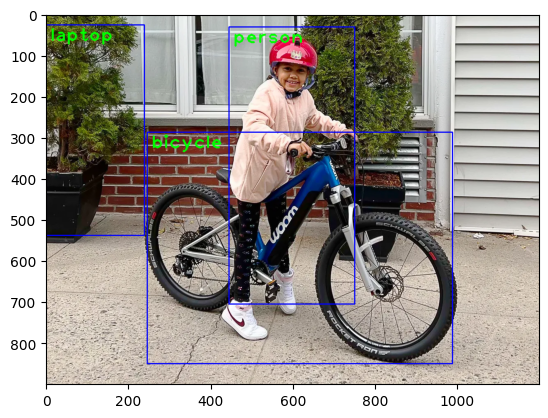

In [26]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [33]:
# from google.colab.patches import cv2_imshow
cap=cv2.VideoCapture("Y2meta.app-pexels george morina 5330833 1920x1080 30fps-(1080p).mp4")
if not cap.isOpened():
  cap=cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError('Cant open the video')

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
  ret, frame=cap.read()
  ClassIndex, confidece, bbox=model.detect(frame,confThreshold=0.55)
  print(ClassIndex)
  if(len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
      if(ClassInd<=80):
        cv2.rectangle(frame,boxes,(255,0,0),2)
        cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10, boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)

  cv2.imshow("Object detection",frame)

  if cv2.waitKey(2) & 0xff==ord('q'):
    break
cap.release()
cv2.destroyaLLWindows()

[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[ 6  1  1  1  1  1  1 10  1]
[ 6  1  1  1  1  1 10]
[ 6  1  1  1  1  1 10  3]
[ 6  1  1  1  1  1 10]
[ 6  1  1  1  3  1 10  1]
[ 6  1  1  3  1  1 10  1]
[ 6  1  1  3  1  1  1 10  1]
[ 6  1  1  3  1  1 10  1  6  1]
[ 6  1  1  3  1 10  1  1  6  1]
[ 6  1  1  3  1 10  1  1  6]
[ 6  1  1  3  1 10  1  1  1  1]
[ 6  1  1  3  1 10  6  1]
[ 6  1  1  1  3  6  1  1  1 10]
[ 6  1  1  1  3  1  1 10  1  6]
[ 6  1  1  1  3 10  6  1  1  1]
[ 6  1  1  1  1  3 10  6  1  1  1]
[ 6  1  1  1  3  1  1  6 10  1]
[ 6  1  1  1  3  1 10  1  6  1]
[ 6  1  1  3  1 10  1  6  1  1]
[ 6  1  1  3  1 10  6  1  1]
[ 6  1  1  1  3 10  8  1  6]
[ 6  1  1  1  3 10  6  1  1]
[ 6  1  1  1  3  1 10  6  1]
[ 6  1  3  1  1 10  1]
[ 6  1  1  3  1 10]
[ 6  1  1  1  3 10  1]
[ 6  1  1  1  3 10  1]
[ 6  1  1  1  3  1 10  6  1  1]
[ 6  1  1  1  3  1  1 10  1]
[ 6  1  1  3  1  1 10  1  1]
[ 6  1  1

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
